In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
df = pd.read_excel('D:\Telco_customer_churn.xlsx\Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [12]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

non_numeric_rows = df[df['Total Charges'].isna()]

df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


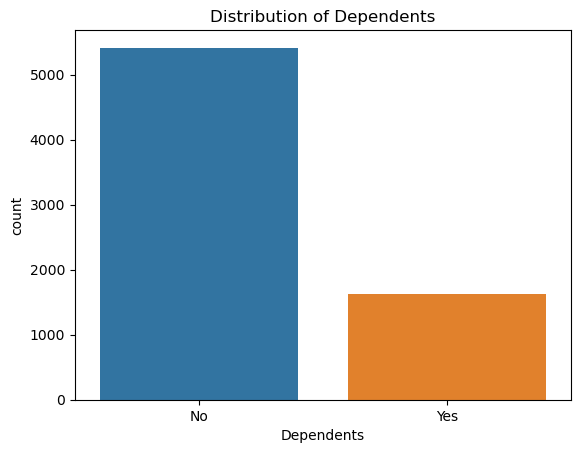

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


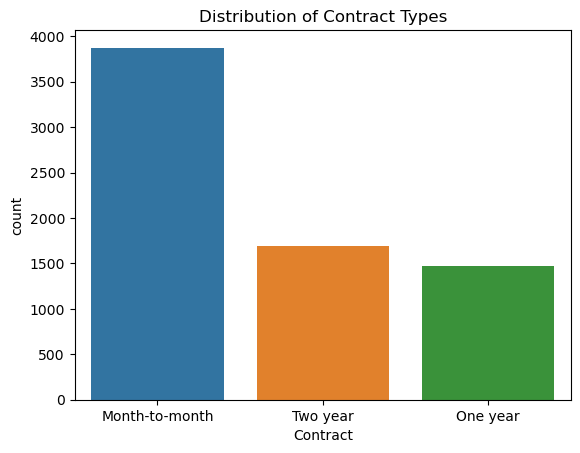

In [14]:
sns.countplot(x='Dependents', data=df)
plt.title('Distribution of Dependents')
plt.show()

sns.countplot(x='Contract', data=df)
plt.title('Distribution of Contract Types')
plt.show()

Gender Proportion:
 Gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Contract Proportion:
 Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

Internet Service Proportion:
 Internet Service
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


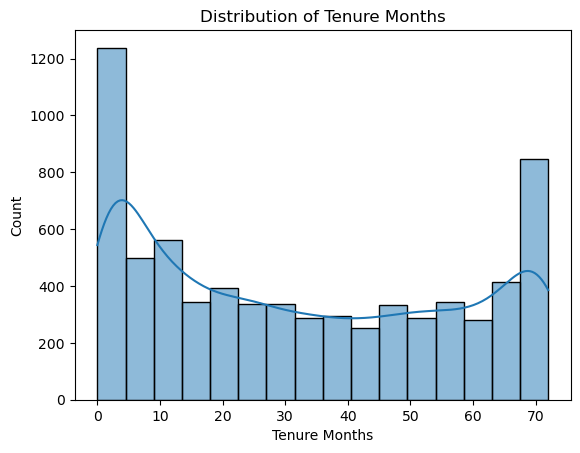

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


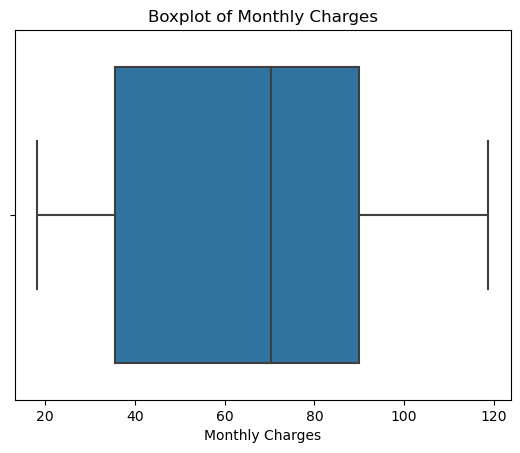

In [16]:
gender_proportion = df['Gender'].value_counts(normalize=True)
print("Gender Proportion:\n", gender_proportion)

contract_proportion = df['Contract'].value_counts(normalize=True)
print("\nContract Proportion:\n", contract_proportion)

internet_service_proportion = df['Internet Service'].value_counts(normalize=True)
print("\nInternet Service Proportion:\n", internet_service_proportion)

sns.histplot(df['Tenure Months'], kde=True)
plt.title('Distribution of Tenure Months')
plt.show()

sns.boxplot(x='Monthly Charges', data=df)
plt.title('Boxplot of Monthly Charges')
plt.show()

In [18]:
numerical_summary = df[['Tenure Months', 'Monthly Charges', 'Total Charges']].describe()
print("Summary Statistics:\n", numerical_summary)

Summary Statistics:
        Tenure Months  Monthly Charges  Total Charges
count    7043.000000      7043.000000    7043.000000
mean       32.371149        64.761692    2281.916928
std        24.559481        30.090047    2265.270398
min         0.000000        18.250000      18.800000
25%         9.000000        35.500000     402.225000
50%        29.000000        70.350000    1397.475000
75%        55.000000        89.850000    3786.600000
max        72.000000       118.750000    8684.800000


Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


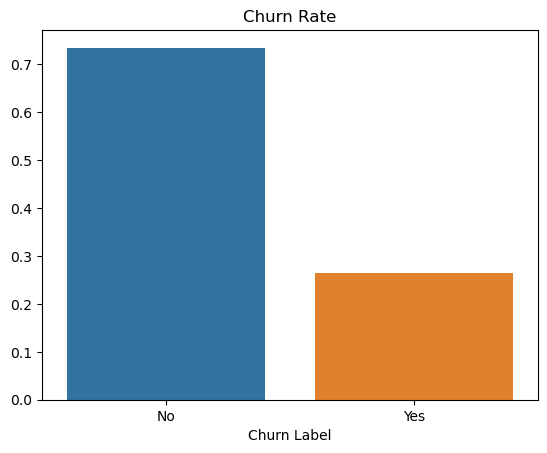

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

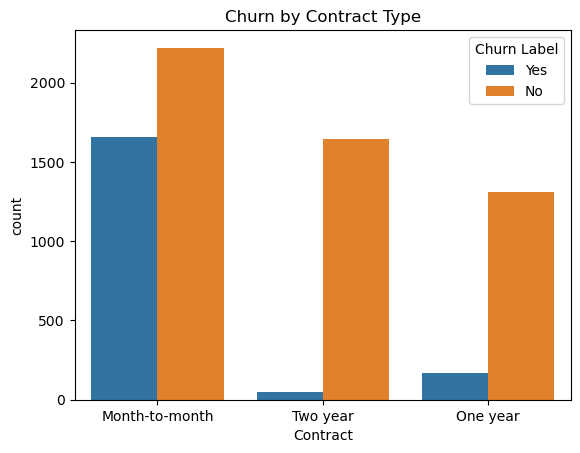

In [20]:
churn_rate = df['Churn Label'].value_counts(normalize=True)
print(churn_rate)
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Churn Rate')
plt.show()

# Relationship between Contract Type and Churn
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Churn by Contract Type')
plt.show()

In [22]:
# Count the number of customers by contract type
contract_counts = df.groupby('Contract')['Churn Value'].count()

# Count the number of churned customers by contract type
churned_contract_counts = df[df['Churn Value'] == 1].groupby('Contract')['Churn Value'].count()

# Calculate the churn rate for each contract type
churn_rate_by_contract = churned_contract_counts / contract_counts

# Display the results
churn_rate_by_contract

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn Value, dtype: float64

In [24]:
binary_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 
               'Phone Service', 'Paperless Billing']


label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
non_ordinal_cols = ['Multiple Lines', 'Internet Service', 'Payment Method',
                'Online Security', 'Online Backup', 'Device Protection', 
                'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Churn Reason']

df = pd.get_dummies(df, columns=non_ordinal_cols, drop_first=True)


high_cardinality_cols = ['City', 'State', 'Country']

for col in high_cardinality_cols:
    freq_encoding = df[col].value_counts() / len(df)
    df[col] = df[col].map(freq_encoding)
    
df = df.drop(columns=['CustomerID', 'Churn Label', 'Lat Long', 'Latitude', 'Longitude', 'Zip Code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 56 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Count                                                   7043 non-null   int64  
 1   Country                                                 7043 non-null   float64
 2   State                                                   7043 non-null   float64
 3   City                                                    7043 non-null   float64
 4   Gender                                                  7043 non-null   int32  
 5   Senior Citizen                                          7043 non-null   int32  
 6   Partner                                                 7043 non-null   int32  
 7   Dependents                                              7043 non-null   int32  
 8   Tenure Months                         

In [26]:
corr_matrix = df.corr()
churn_corr = corr_matrix['Churn Value'].sort_values(ascending=False)
churn_corr

Churn Value                                               1.000000
Churn Score                                               0.664897
Internet Service_Fiber optic                              0.308020
Payment Method_Electronic check                           0.301919
Churn Reason_Attitude of support person                   0.278537
Churn Reason_Competitor offered higher download speeds    0.276291
Churn Reason_Competitor offered more data                 0.255294
Churn Reason_Don't know                                   0.248766
Churn Reason_Competitor made better offer                 0.236948
Churn Reason_Competitor had better devices                0.228164
Churn Reason_Network reliability                          0.202697
Churn Reason_Product dissatisfaction                      0.201696
Churn Reason_Price too high                               0.197645
Monthly Charges                                           0.193356
Paperless Billing                                         0.19

In [28]:
# Average monthly charges for Fiber Optic Internet users compared to other users
fiber_optic_charges = df[df['Internet Service_Fiber optic'] == 1]['Monthly Charges'].mean()
no_internet_charges = df[df['Internet Service_No'] == 1]['Monthly Charges'].mean()

print(f"fiber_optic_charges = {fiber_optic_charges} \n no_internet_charges = {no_internet_charges})")

fiber_optic_charges = 91.50012919896642 
 no_internet_charges = 21.079193971166447)


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


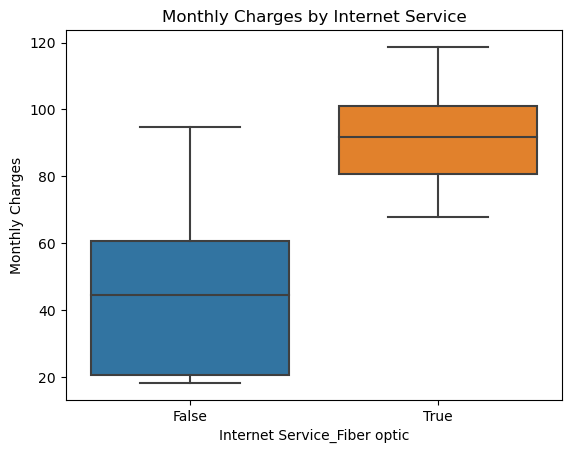

In [30]:
sns.boxplot(x='Internet Service_Fiber optic', y='Monthly Charges', data=df)
plt.title('Monthly Charges by Internet Service')
plt.show()


In [32]:
# Average monthly charges for Electronic Check payment method compared to other methods
electronic_check_charges = df[df['Payment Method_Electronic check'] == 1]['Monthly Charges'].mean()
mailed_check_charges = df[df['Payment Method_Mailed check'] == 1]['Monthly Charges'].mean()
automatic_credit_card_charges = df[df['Payment Method_Credit card (automatic)'] == 1]['Monthly Charges'].mean()

print(f"""electronic_check_charges = {electronic_check_charges}
mailed_check_charges = {mailed_check_charges}
automatic_credit_card_charges = {automatic_credit_card_charges}""")

electronic_check_charges = 76.25581395348837
mailed_check_charges = 43.91705955334989
automatic_credit_card_charges = 66.5123850197109


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


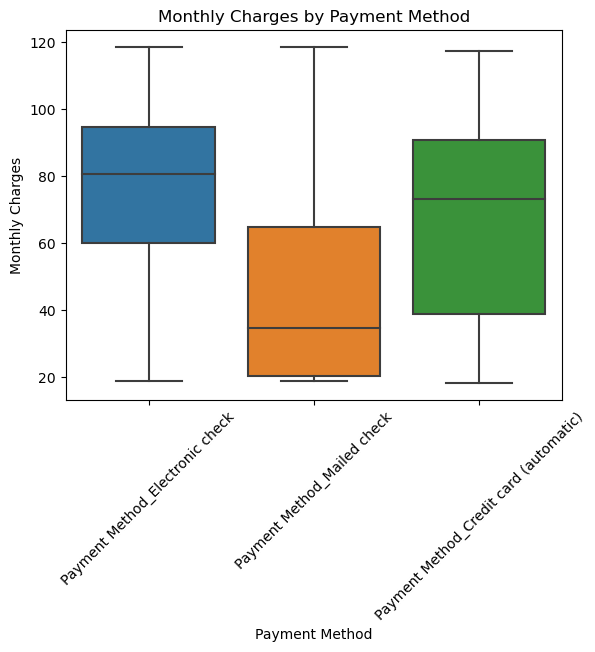

In [34]:
payment_methods = ['Payment Method_Electronic check', 'Payment Method_Mailed check', 'Payment Method_Credit card (automatic)']
df_melted = df.melt(id_vars=['Monthly Charges'], value_vars=payment_methods,
                    var_name='Payment Method', value_name='Payment Method Value')

df_melted = df_melted[df_melted['Payment Method Value'] == 1]

sns.boxplot(x='Payment Method', y='Monthly Charges', data=df_melted)
plt.title('Monthly Charges by Payment Method')
plt.xticks(rotation=45)
plt.show()

In [36]:
churn_reason_columns = [col for col in df.columns if col.startswith('Churn Reason_')]


fiber_optic_churn_reasons = df[df['Internet Service_Fiber optic'] == 1][churn_reason_columns].mean()

print(f"Churn Reasons for Fiber Optic Users:\n{fiber_optic_churn_reasons}")

Churn Reasons for Fiber Optic Users:
Churn Reason_Attitude of support person                   0.042959
Churn Reason_Competitor had better devices                0.026486
Churn Reason_Competitor made better offer                 0.033592
Churn Reason_Competitor offered higher download speeds    0.041990
Churn Reason_Competitor offered more data                 0.038760
Churn Reason_Deceased                                     0.001292
Churn Reason_Don't know                                   0.031331
Churn Reason_Extra data charges                           0.013889
Churn Reason_Lack of affordable download/upload speed     0.008721
Churn Reason_Lack of self-service on Website              0.020026
Churn Reason_Limited range of services                    0.008721
Churn Reason_Long distance charges                        0.010659
Churn Reason_Moved                                        0.012920
Churn Reason_Network reliability                          0.021641
Churn Reason_Poor experti

In [38]:
electronic_check_churn_reasons = df[df['Payment Method_Electronic check'] == 1][churn_reason_columns].mean()

print(f"Churn Reasons for Electronic Check Users:\n{electronic_check_churn_reasons}")

Churn Reasons for Electronic Check Users:
Churn Reason_Attitude of support person                   0.046512
Churn Reason_Competitor had better devices                0.032558
Churn Reason_Competitor made better offer                 0.035095
Churn Reason_Competitor offered higher download speeds    0.047357
Churn Reason_Competitor offered more data                 0.039323
Churn Reason_Deceased                                     0.002537
Churn Reason_Don't know                                   0.034249
Churn Reason_Extra data charges                           0.010571
Churn Reason_Lack of affordable download/upload speed     0.009302
Churn Reason_Lack of self-service on Website              0.021142
Churn Reason_Limited range of services                    0.012262
Churn Reason_Long distance charges                        0.010148
Churn Reason_Moved                                        0.011416
Churn Reason_Network reliability                          0.026216
Churn Reason_Poor ex

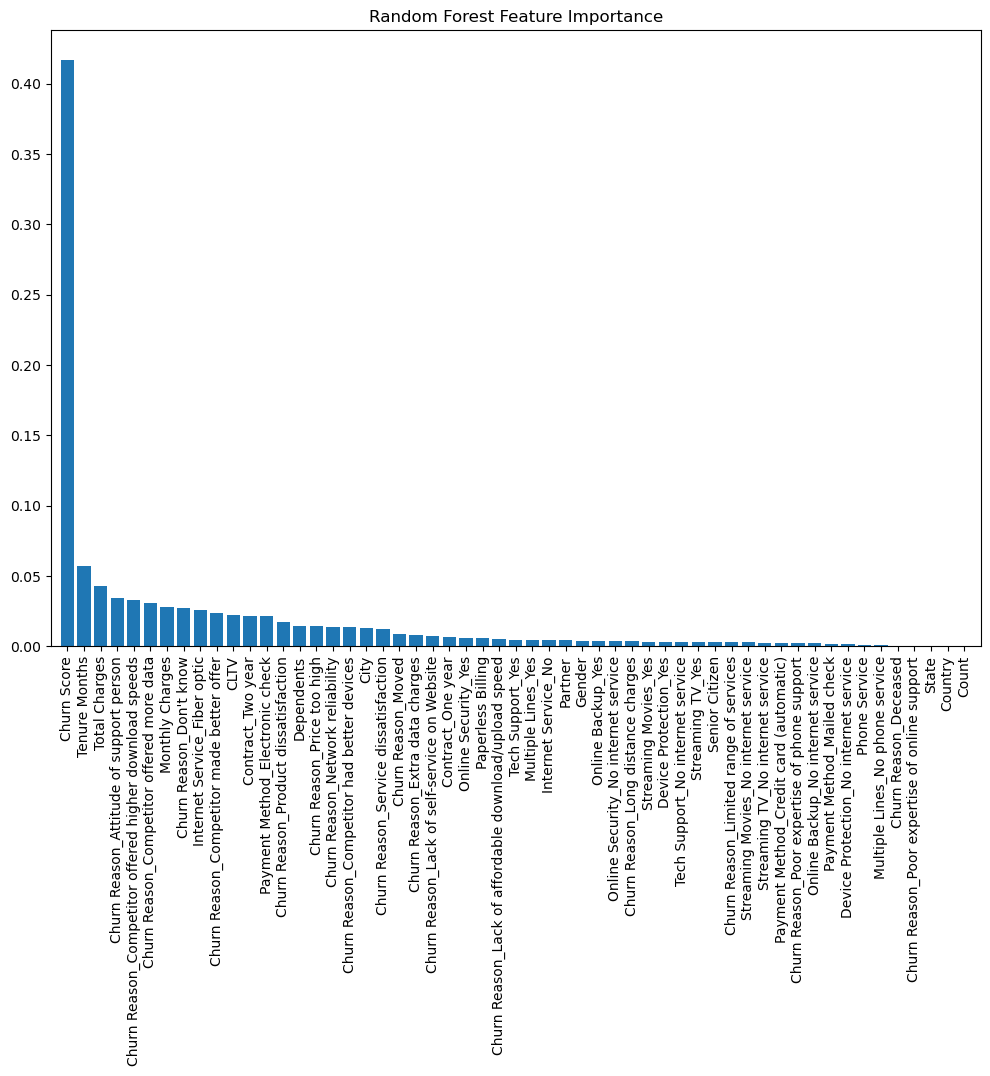

In [40]:
X = df.drop(['Churn Value'], axis=1)
y = df['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Random Forest Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Cluster
0    0.009564
1    0.129452
2    0.593076
3    0.191880
Name: Churn Value, dtype: float64


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


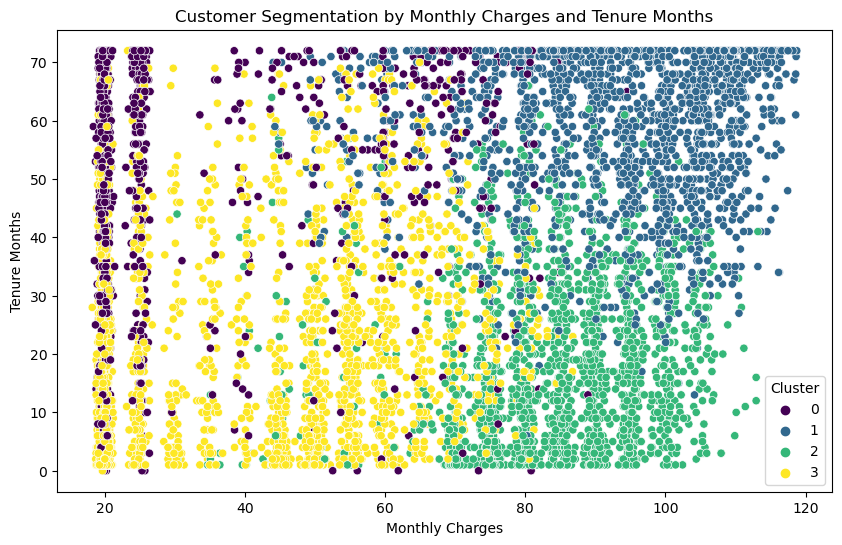

In [49]:
features = [
    'Monthly Charges', 'Tenure Months', 'Internet Service_Fiber optic', 
    'Payment Method_Electronic check', 'Churn Score', 'Paperless Billing', 
    'Senior Citizen', 'Contract_One year', 'Contract_Two year', 
    'Total Charges', 'Dependents', 'Streaming TV_Yes', 'Streaming Movies_Yes'
]
X_segment = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_segment)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# analyze churn rates by cluster
churn_rates = df.groupby('Cluster')['Churn Value'].mean()
print(churn_rates)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Monthly Charges'], y=df['Tenure Months'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation by Monthly Charges and Tenure Months')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure Months')
plt.legend(title='Cluster')
plt.show()

In [51]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(centers)

   Monthly Charges  Tenure Months  Internet Service_Fiber optic  \
0        -1.013922       0.717377                     -0.855653   
1         0.953270       1.066300                      0.476865   
2         0.602179      -0.644398                      0.956148   
3        -0.826032      -0.545939                     -0.830579   

   Payment Method_Electronic check  Churn Score  Paperless Billing  \
0                        -0.629932    -0.380110          -0.624947   
1                        -0.143982    -0.221120           0.282556   
2                         0.739934     0.535434           0.448762   
3                        -0.267819    -0.135796          -0.344557   

   Senior Citizen  Contract_One year  Contract_Two year  Total Charges  \
0       -0.333125          -0.514249           1.768812      -0.220092   
1        0.079706           0.420662           0.434842       1.415316   
2        0.416772          -0.456235          -0.559452      -0.387617   
3       -0.281142